In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
np.random.seed(1)
n_row = 1000
orders = pd.DataFrame({"revenue": np.random.randint(0, 4000, n_row)})
display(orders)

,revenue
0,1061
1,235
2,3980
3,1096
4,3839
...,...
995,3175
996,545
997,1119
998,1449


In [3]:
boot_it = 2000
boot_data = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = orders['revenue'].sample(len(orders['revenue']), replace = True)
    boot_data.append(np.median(samples))

# Скорректируем оценку
orig_theta = np.median(orders['revenue'])
boot_theta = np.mean(boot_data) # среднее по бутстрапированной статистике
delta_val = abs(orig_theta - boot_theta) # дельта для сдвига
boot_data = [i - delta_val for i in boot_data] # сдвигаем бут разницу статистик

print(f'Original: {orig_theta}, Boot: {boot_theta}, Boot ba: {np.mean(boot_data)}')

Original: 1931.5, Boot: 1947.40275, Boot ba: 1931.4999999999995


In [4]:
# Найдем доверительный интервал
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci = pd.Series(boot_data).quantile([left_ci, right_ci])

print(ci)

0.025    1785.09725
0.975    2118.62225
dtype: float64


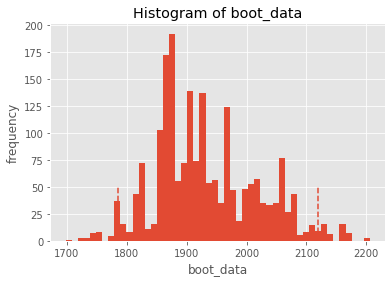

In [5]:
plt.hist(pd.Series(boot_data), bins = 50)
plt.style.use('ggplot')
plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()